Starting fold comparison analysis...
Processed fold_1: Accuracy=0.9641, Macro F1=0.9337
Processed fold_2: Accuracy=0.9793, Macro F1=0.9351
Processed fold_3: Accuracy=0.9828, Macro F1=0.9138
Processed fold_4: Accuracy=0.9795, Macro F1=0.8960
Processed fold_5: Accuracy=0.9702, Macro F1=0.9132
Processed fold_6: Accuracy=0.9765, Macro F1=0.8640
Processed fold_7: Accuracy=0.9979, Macro F1=0.9833
Processed fold_8: Accuracy=1.0000, Macro F1=1.0000
Processed fold_9: Accuracy=0.9979, Macro F1=0.9517
Processed fold_10: Accuracy=0.9757, Macro F1=0.9064

Results saved to: fold_comparison_results.csv
Plots saved to: fold_comparison_plots.png


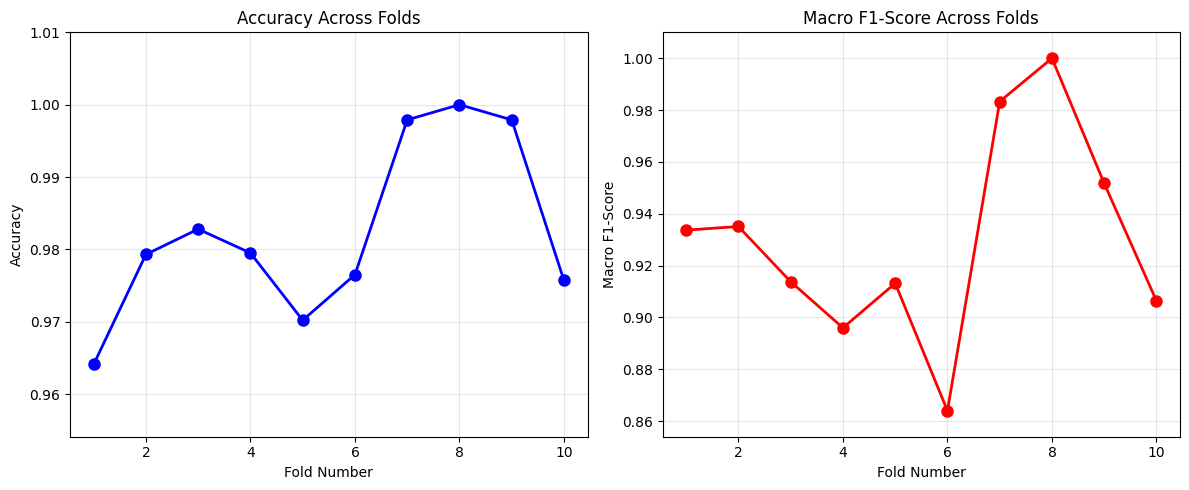

In [1]:
import os
import re
import pandas as pd
from pathlib import Path

def parse_classification_report(file_path):
    """Parse classification_report.txt file and extract key metrics"""
    with open(file_path, 'r') as f:
        content = f.read()
    
    # Extract accuracy
    accuracy_match = re.search(r'accuracy\s+(\d+\.\d+)', content)
    accuracy = float(accuracy_match.group(1)) if accuracy_match else None
    
    # Extract macro avg f1-score
    macro_avg_match = re.search(r'macro avg\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)', content)
    macro_f1 = float(macro_avg_match.group(3)) if macro_avg_match else None
    
    return accuracy, macro_f1

def compare_folds(base_path=".", model_name="YourModel"):
    """Compare results across all folds"""
    results = []
    
    # Process each fold
    for fold_num in range(1, 11):  # fold_1 to fold_10
        fold_dir = Path(base_path) / f"fold_{fold_num}"
        report_file = fold_dir / "classification_report.txt"
        
        if report_file.exists():
            try:
                accuracy, macro_f1 = parse_classification_report(report_file)
                
                results.append({
                    'model_name': model_name,
                    'fold_number': fold_num,
                    'accuracy': accuracy,
                    'f1_score_macro_avg': macro_f1
                })
                
                print(f"Processed fold_{fold_num}: Accuracy={accuracy:.4f}, Macro F1={macro_f1:.4f}")
                
            except Exception as e:
                print(f"Error processing fold_{fold_num}: {e}")
        else:
            print(f"Warning: {report_file} not found")
    
    return results

def generate_comparison_report(results):
    """Generate comparison report and statistics"""
    if not results:
        print("No results to analyze")
        return
    
    df = pd.DataFrame(results)

    # Save results to CSV
    output_file = "fold_comparison_results.csv"
    df.to_csv(output_file, index=False, float_format='%.4f')
    print(f"\nResults saved to: {output_file}")
    
    return df

def main():
    # Configuration
    BASE_PATH = "./GNN with events only/folds data"  # Current directory, change if needed
    MODEL_NAME = "GNN_events_only_processed_embeddings"  # Change to your actual model name
    
    print("Starting fold comparison analysis...")
    
    # Parse all fold results
    results = compare_folds(BASE_PATH, MODEL_NAME)
    
    if results:
        # Generate comparison report
        df = generate_comparison_report(results)
        
        # Optional: Create visualizations
        try:
            import matplotlib.pyplot as plt
            
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
            
            # Accuracy plot
            ax1.plot(df['fold_number'], df['accuracy'], 'bo-', linewidth=2, markersize=8)
            ax1.set_xlabel('Fold Number')
            ax1.set_ylabel('Accuracy')
            ax1.set_title('Accuracy Across Folds')
            ax1.grid(True, alpha=0.3)
            ax1.set_ylim([df['accuracy'].min() - 0.01, df['accuracy'].max() + 0.01])
            
            # Macro F1-Score plot
            ax2.plot(df['fold_number'], df['f1_score_macro_avg'], 'ro-', linewidth=2, markersize=8)
            ax2.set_xlabel('Fold Number')
            ax2.set_ylabel('Macro F1-Score')
            ax2.set_title('Macro F1-Score Across Folds')
            ax2.grid(True, alpha=0.3)
            ax2.set_ylim([df['f1_score_macro_avg'].min() - 0.01, df['f1_score_macro_avg'].max() + 0.01])
            
            plt.tight_layout()
            plt.savefig('fold_comparison_plots.png', dpi=300, bbox_inches='tight')
            print("Plots saved to: fold_comparison_plots.png")
            plt.show()
            
        except ImportError:
            print("Matplotlib not available. Skipping visualization.")
    
    else:
        print("No valid results found. Please check your file paths and formats.")

if __name__ == "__main__":
    main()
